### Examine the annotations in COCO format

In [3]:
from pycocotools.coco import COCO
import torchvision

In [4]:
data = torchvision.datasets.CocoDetection("images", "annotations-part1-coco.json")

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


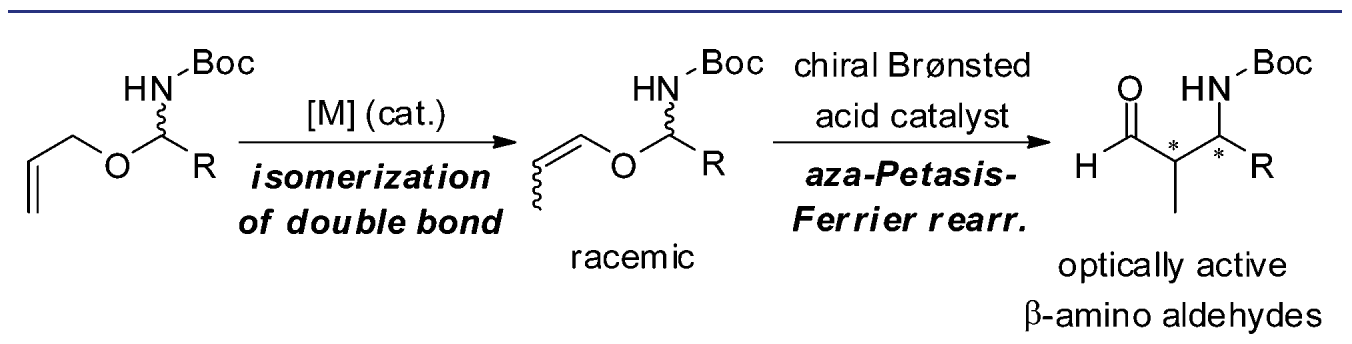

In [40]:
img, target = data[227]
img

In [12]:
# pycocotools

coco = COCO("./annotations-part1-coco.json")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [14]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'id': 1, 'name': 'structure', 'supercategory': ''},
 {'id': 2, 'name': 'text', 'supercategory': ''},
 {'id': 3, 'name': 'identifier', 'supercategory': ''},
 {'id': 4, 'name': 'yield', 'supercategory': ''},
 {'id': 5, 'name': 'supplement', 'supercategory': ''}]

In [20]:
img_ids = [coco.getImgIds(catIds=[x]) for x in [1,2,3,4,5]]
[len(x) for x in img_ids]

[117, 109, 82, 6, 80]

In [35]:
img = coco.loadImgs(229)[0]
ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=[1,2,3,4,5])
anns = coco.loadAnns(ann_ids)
anns

[{'id': 270,
  'image_id': 229,
  'category_id': 1,
  'segmentation': [],
  'area': 3175.899399999998,
  'bbox': [17.94, 131.33, 96.62, 32.87],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 271,
  'image_id': 229,
  'category_id': 5,
  'segmentation': [],
  'area': 1408753.4999999998,
  'bbox': [5.18, 346.43, 1341.67, 1050.0],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 272,
  'image_id': 229,
  'category_id': 3,
  'segmentation': [],
  'area': 1797.7959999999991,
  'bbox': [1249.32, 283.65, 50.05, 35.92],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 273,
  'image_id': 229,
  'category_id': 3,
  'segmentation': [],
  'area': 1723.3208999999974,
  'bbox': [913.69, 283.95, 47.99, 35.91],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 274,
  'image_id': 229,
  'category_id': 3,
  'segmentation': [],
  'area': 1925.449500000002,
  'bbox': [261.11, 283.09, 50.55, 38.09],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 

Image name: images/ja501560x-Table-c1.png


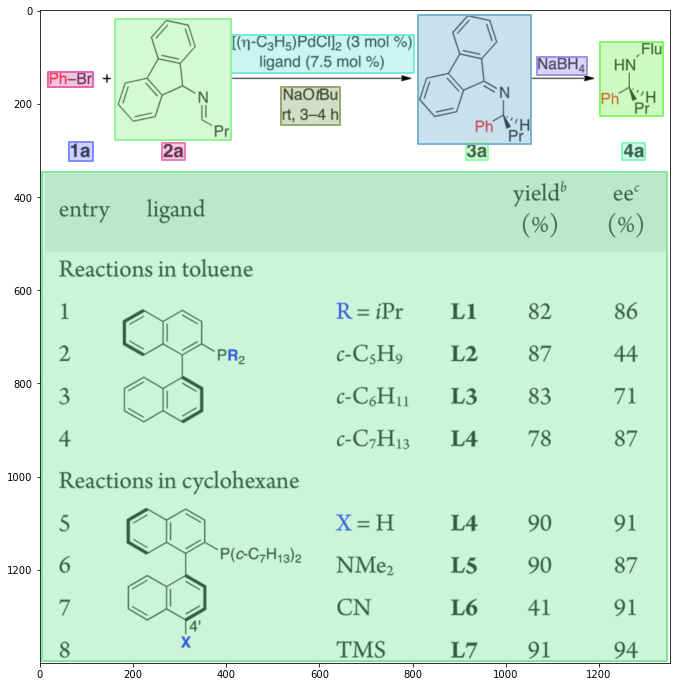

In [43]:
import matplotlib.pyplot as plt
import skimage.io as io

import pylab
pylab.rcParams['figure.figsize'] = (15.0, 12.0)

img_name = 'images/ja501560x-Table-c1.png'
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True)

In [41]:
img = coco.loadImgs(229)[0]
ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=[1,2,3,4,5])
anns = coco.loadAnns(ann_ids)
anns

Help on method showAnns in module pycocotools.coco:

showAnns(anns, draw_bbox=False) method of pycocotools.coco.COCO instance
    Display the specified annotations.
    :param anns (array of object): annotations to display
    :return: None



## Seperate out valid diagrams from data (a.k.a. containing >=1 bboxes)

In [2]:
# pycocotools

from pycocotools.coco import COCO
import torchvision

coco = COCO("./annotations-part1-coco.json")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [14]:
# collect image ids for valid reaction diagrams
img_ids = set()
for ann in coco.dataset['annotations']:
    img_ids.add(ann['image_id'])

In [15]:
print(len(img_ids))
coco.dataset['annotations'][0]

117


{'id': 1,
 'image_id': 17,
 'category_id': 2,
 'segmentation': [],
 'area': 54765.827999999994,
 'bbox': [476.06, 5.12, 410.6, 133.38],
 'iscrowd': 0,
 'attributes': {'occluded': False}}

In [25]:
coco.dataset['annotations'][0]

{'id': 1,
 'image_id': 17,
 'category_id': 2,
 'segmentation': [],
 'area': 54765.827999999994,
 'bbox': [476.06, 5.12, 410.6, 133.38],
 'iscrowd': 0,
 'attributes': {'occluded': False}}

In [40]:
# Split annotations into train/val

from copy import deepcopy
import json
from random import shuffle

img_ids = list(img_ids)
shuffle(img_ids)

num_train = int(len(img_ids) * 0.9)
train_img_ids = img_ids[:num_train]
val_img_ids = img_ids[num_train:]

# split train/val from original annotations file
dataset = coco.dataset
train_dataset = deepcopy(dataset)
val_dataset = deepcopy(dataset)

train_anns = []
val_anns = []
for ann in dataset['annotations']:
    if ann['image_id'] in train_img_ids:
        ann['id'] = len(train_anns) + 1
        train_anns.append(ann)
    elif ann['image_id'] in val_img_ids:
        ann['id'] = len(val_anns) + 1
        val_anns.append(ann)

train_dataset['annotations'] = train_anns
val_dataset['annotations'] = val_anns

with open("part1/annotations/rxn_train.json", "w") as f:
    json.dump(train_dataset, f)
with open("part1/annotations/rxn_val.json", "w") as f:
    json.dump(val_dataset, f)

# copy train/val images into corresponding folders
from shutil import copyfile

for i in train_img_ids:
    img_name = coco.dataset['images'][i-1]['file_name']
    src_path = f"images/{img_name}"
    tgt_path = f"part1/train2017/{img_name}"
    copyfile(src_path, tgt_path)
    
for i in val_img_ids:
    img_name = coco.dataset['images'][i-1]['file_name']
    src_path = f"images/{img_name}"
    tgt_path = f"part1/val2017/{img_name}"
    copyfile(src_path, tgt_path)

In [41]:
# validate

train_coco = COCO("part1/annotations/rxn_train.json")
val_coco = COCO("part1/annotations/rxn_val.json")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [43]:
len(train_coco.imgToAnns)

105